In [ ]:
#CODE TO SETUP WANDB

!pip install wandb

import wandb
from wandb.keras import WandbCallback

# wandb.login()

In [ ]:
%matplotlib inline
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.preprocessing import OneHotEncoder
from sklearn import preprocessing

import matplotlib.image as mpimg
from skimage.io import imread, imshow
from skimage import data, color, io, filters, morphology,transform, exposure, feature, util
from scipy import ndimage
#import Tensorflow namespaces

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.layers import Dense, Dropout, Flatten, BatchNormalization
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras import backend as K
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing import image
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.applications.vgg19 import preprocess_input, decode_predictions
from sklearn.preprocessing import StandardScaler
import pickle
from random import randint
import cv2
from sklearn.model_selection import train_test_split
from PIL import Image

In [ ]:
# The Fashion-MNIST dataset consists of thousands of grey-valued images of clothes from 10 different classes: 0: 'T-shirt/top', 1: 'Trouser', 2: 'Pullover', 3: 'Dress', 4: 'Coat', 5: 'Sandal', 6: 'Shirt', 7: 'Sneaker', 8: 'Bag', 9: 'Ankle boot'.

df_train = pd.read_csv('/content/drive/MyDrive/Deep Learning/Session_02_Convolutional_Neural_Networks_Assignment/fashion-mnist_train.csv')
df_test = pd.read_csv('/content/drive/MyDrive/Deep Learning/Session_02_Convolutional_Neural_Networks_Assignment/fashion-mnist_test.csv')
df_train.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,0,0,105,92,101,107,100,132,0,0,2,4,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,150,...,211,220,214,74,0,255,222,128,0,0,0,0,0,0,0,0,0,44,12,0,0,40,134,162,191,214,163,146,165,79,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,0,114,183,112,55,23,72,102,165,160,28,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,24,188,163,93,...,171,249,207,197,202,45,0,3,0,0,0,0,0,0,0,0,0,0,1,0,0,0,22,21,25,69,52,45,74,39,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,0,0,0,46,0,21,68,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,25,187,189,...,230,237,229,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,68,116,112,136,147,144,121,102,63,0,0,0,0,0,0,0,0,0,0


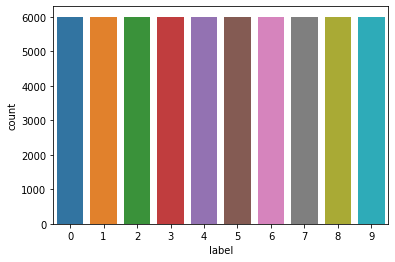

In [ ]:
# Fashion MNIST
sns.countplot(data=df_train, x='label')


In [ ]:
X_train=df_train.drop(['label'],axis=1)
y_train=df_train['label']

X_test=df_test.drop(['label'],axis=1)
y_test=df_test['label']

In [ ]:
# Create training set and test set
# Reshape into Tensorflow format (number of images, width, height, color channels)

X_train = X_train.values.reshape((len(X_train),28,28,1))
X_test  = X_test.values.reshape((len(X_test),28,28,1))

print(X_train.shape)
print(X_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [ ]:
# Normalize the data
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [ ]:
# CNN model, without pre-trained weights - parameter tuning has been performed with wandb but is not included in this notebook

img_rows, img_cols = 28, 28
input_shape = (img_rows, img_cols,1)
adam = tf.keras.optimizers.Adam(0.002515)
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=20)
model = Sequential()

model.add(Conv2D(128, kernel_size=(3, 3), input_shape=input_shape)) 
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
#-----------------------------------------------
model.add(Conv2D(64, kernel_size=(3, 3))) 
model.add(BatchNormalization())
model.add(Activation('relu'))      
model.add(MaxPooling2D(pool_size=(2, 2)))
#-----------------------------------------------
model.add(Flatten()) 
model.add(Dropout(0.3))
model.add(Dense(32, activation='relu')) 
model.add(Dropout(0.3))
#-----------------------------------------------
model.add(Dense(10, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy',
                optimizer=adam,
                metrics=['accuracy'])

# Training van het CNN
history = model.fit(X_train, y_train,batch_size=32, epochs=50, validation_split=0.3, verbose=1, callbacks=[es])

Epoch 1/50
1313/1313 [==============================] - 12s 9ms/step - loss: 0.8700 - accuracy: 0.6591 - val_loss: 0.5318 - val_accuracy: 0.7913
Epoch 2/50
1313/1313 [==============================] - 12s 9ms/step - loss: 0.6770 - accuracy: 0.7397 - val_loss: 0.4426 - val_accuracy: 0.8401
Epoch 3/50
1313/1313 [==============================] - 11s 9ms/step - loss: 0.6054 - accuracy: 0.7748 - val_loss: 0.3959 - val_accuracy: 0.8536
Epoch 4/50
1313/1313 [==============================] - 11s 9ms/step - loss: 0.5534 - accuracy: 0.7955 - val_loss: 0.3739 - val_accuracy: 0.8723
Epoch 5/50
1313/1313 [==============================] - 12s 9ms/step - loss: 0.5221 - accuracy: 0.8071 - val_loss: 0.3829 - val_accuracy: 0.8597
Epoch 6/50
1313/1313 [==============================] - 11s 9ms/step - loss: 0.5054 - accuracy: 0.8144 - val_loss: 0.3299 - val_accuracy: 0.8846
Epoch 7/50
1313/1313 [==============================] - 12s 9ms/step - loss: 0.4811 - accuracy: 0.8224 - val_loss: 0.3331 - val_ac

## Test evaluation

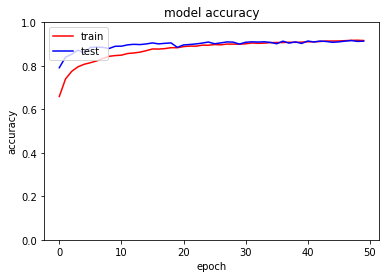

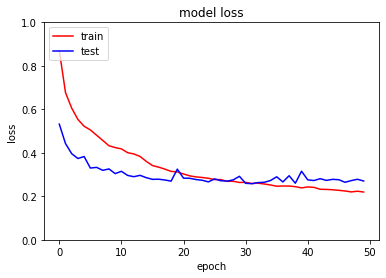

In [ ]:
# Accuray 
plt.plot(history.history['accuracy'],'r')
plt.plot(history.history['val_accuracy'],'b')
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.ylim([0, 1])
plt.show()
# Loss 
plt.plot(history.history['loss'],'r')
plt.plot(history.history['val_loss'],'b')

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.ylim([0, 1])
plt.show()

In [ ]:
y_pred = model.predict_classes(X_test)
print('\n')
print(classification_report(y_test, y_pred))

cf = confusion_matrix(y_test, y_pred)

print(cf)
print(accuracy_score(y_test, y_pred) * 100) 

# Model seems to perform pretty well on all classes, There is no real overfit. The only class it seems to struggle with is class 6. Class 6 represents shirts


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '




              precision    recall  f1-score   support

           0       0.86      0.87      0.86      1000
           1       0.99      0.99      0.99      1000
           2       0.87      0.88      0.88      1000
           3       0.94      0.91      0.92      1000
           4       0.89      0.87      0.88      1000
           5       0.99      0.97      0.98      1000
           6       0.75      0.76      0.76      1000
           7       0.95      0.97      0.96      1000
           8       0.98      0.99      0.98      1000
           9       0.97      0.97      0.97      1000

    accuracy                           0.92     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.92      0.92      0.92     10000

[[870   2  21  14   0   1  82   0  10   0]
 [  2 986   0   7   1   0   4   0   0   0]
 [ 14   0 880   5  37   0  61   0   3   0]
 [ 14   5   7 914  29   0  28   0   2   1]
 [  2   1  46  11 867   0  73   0   0   0]
 [  0   0   0   0   0 96

In [ ]:
#GETTING WRONG IMAGE IDS
wrongs=[]
differences=y_pred==y_test
for i in range(len(differences)):
  if differences[i]== False:
    wrongs.append(i)

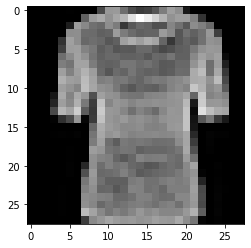

In [ ]:
value = randint(0, len(wrongs))
plt.imshow(np.reshape(X_test[wrongs[value]], (28, 28)), cmap="gray")
plt.show()
#RUN AGAIN TO SEE DIFFERENT MISQUALIFIED IMAGE - Mostly shirts or things that look a lot like shirts